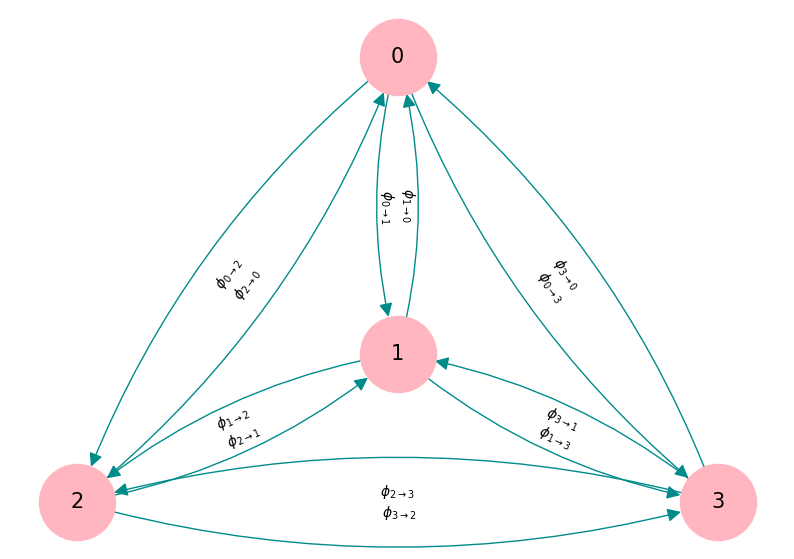

In [1]:
import networkx as nx
import matplotlib.pyplot as plt

plt.style.use('Solarize_Light2')

G = nx.DiGraph()
edges = [
    (0, 1), (0, 2), (0, 3),
    (1, 0), (1, 2), (1, 3),
    (2, 0), (2, 1), (2, 3),
    (3, 0), (3, 1), (3, 2)
]
G.add_edges_from(edges)

pos = {
    0: [0.75, 1.0],
    1: [0.75, 0.0],
    2: [0.5, -0.5],
    3: [1.0, -0.5]}

edge_labels = {
    (0, 1): '$\\phi_{1\\to 0}$\n $\\phi_{0\\to 1}$',
    (0, 2): '$\\phi_{0\\to 2}$\n $\\phi_{2\\to 0}$',
    (0, 3): '$\\phi_{3\\to 0}$\n $\\phi_{0\\to 3}$',
    (1, 2): '$\\phi_{1\\to 2}$\n $\\phi_{2\\to 1}$',
    (2, 3): '$\\phi_{2\\to 3}$\n $\\phi_{3\\to 2}$',
    (1, 3): '$\\phi_{3\\to 1}$\n $\\phi_{1\\to 3}$'
}

fig, ax = plt.subplots(figsize=(10, 7))
nx.draw(
    G, pos, with_labels=True, node_color='lightpink',
    node_size=3000, arrowsize=20, arrowstyle='-|>',
    connectionstyle='arc3, rad=.14', font_size=15, edge_color='darkcyan'
)
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=10, bbox=dict(alpha=0))

plt.show()

* El método clásico de fuerza bruta usa una matriz \( n\times n \) para guardar las distancias/costos entre cada par de nodos.

A = \begin{bmatrix}
\phi_{0\to 0} & \phi_{0\to 1} & \phi_{0\to 2} & \phi_{0\to 3} \\
\phi_{1\to 0} & \phi_{1\to 1} & \phi_{1\to 2} & \phi_{1\to 3} \\
\phi_{2\to 0} & \phi_{2\to 1} & \phi_{2\to 2} & \phi_{2\to 3} \\
\phi_{3\to 0} & \phi_{3\to 1} & \phi_{3\to 2} & \phi_{3\to 3} \\
\end{bmatrix}



1. La matriz formada por las distancias dadas usando el procedimiento anterior no es unitaria en general, lo que significa que la implementación y manipulación de este operador no es posible en una computadora cuántica.
2. Las fases se sumarán cuando las multiplicamos o tomamos productos tensoriales de estados con estas fases como coeficientes, es decir, las distancias se sumarán como fases, lo cual es necesario para la búsqueda.

La matriz se representa como:

$$
B\ =\ \begin{bmatrix}
e^{i\phi_{1\to 1}} & e^{i\phi_{1\to 2}} & e^{i\phi_{1\to 3}}\\
e^{i\phi_{2\to 1}} & e^{i\phi_{2\to 2}} & e^{i\phi_{2\to 3}}\\
e^{i\phi_{3\to 1}} & e^{i\phi_{3\to 2}} & e^{i\phi_{3\to 3}}\\
\end{bmatrix}
$$

#### Para matrices unitarias: 

* Construimos una matriz unitaria $U$) a partir de la matriz $B$ para cada ciudad/nodo para la fase de estimación como:
 
$$U_{j}\ =\ (\sum_{i=1}^{n}B[j][i]\ \times\ \text{producto externo de todos lo posibles vectores base})\ \text{donde j, i ≥ 0 y j, i $\in$ [1, n]}. 
$$
El resto de elementos en la matriz $U_{j}$ se quedan como 0. Basicamente, $U_{j}$ es una amtriz unitaria diagonal construida por cada una de las columnas de la matriz $B$.

Construimos la matriz unitaria par  j = 1, 2, 3 y 4:

1. $U_{j}$:  $e^{i\phi_{1\to j}}|00\rangle\langle00| + e^{i\phi_{2\to j}}|01\rangle\langle01| + e^{i\phi_{3\to j}}|10\rangle\langle10| + e^{i\phi_{4\to j}}|11\rangle\langle11|$


$$
|00\rangle\langle000|\
=\ \begin{bmatrix}
  1 & 0 & 0 & 0\\ 
  0 & 0 & 0 & 0\\ 
  0 & 0 & 0 & 0\\
  0 & 0 & 0 & 0\\
  \end{bmatrix}
$$

$$
|01\rangle\langle001|\
=\ \begin{bmatrix}
  0 & 0 & 0 & 0\\ 
  0 & 1 & 0 & 0\\ 
  0 & 0 & 0 & 0\\
  0 & 0 & 0 & 0\\
  \end{bmatrix}
$$

$$
|10\rangle\langle010|\
=\ \begin{bmatrix}
  0 & 0 & 0 & 0\\ 
  0 & 0 & 0 & 0\\ 
  0 & 0 & 1 & 0\\
  0 & 0 & 0 & 0\\
  \end{bmatrix}
$$

$$
|11\rangle\langle010|\
=\ \begin{bmatrix}
  0 & 0 & 0 & 0\\ 
  0 & 0 & 0 & 0\\ 
  0 & 0 & 0 & 0\\
  0 & 0 & 0 & 1\\
  \end{bmatrix}
$$

$U_{1} = \begin{bmatrix}
  e^{i\phi_{1\to 1}} & 0 & 0 & 0\\ 
  0 & e^{i\phi_{2\to 1}} & 0 & 0\\ 
  0 & 0 & e^{i\phi_{3\to 1}} & 0\\
  0 & 0 & 0 & e^{i\phi_{4\to 1}}\\
  \end{bmatrix}$ 

$U_{2} = \begin{bmatrix}
  e^{i\phi_{1\to 2}} & 0 & 0 & 0\\ 
  0 & e^{i\phi_{2\to 2}} & 0 & 0\\ 
  0 & 0 & e^{i\phi_{3\to 2}} & 0\\
  0 & 0 & 0 & e^{i\phi_{4\to 2}}\\
  \end{bmatrix}$   

$U_{3} = \begin{bmatrix}
  e^{i\phi_{1\to 3}} & 0 & 0 & 0\\ 
  0 & e^{i\phi_{2\to 3}} & 0 & 0\\ 
  0 & 0 & e^{i\phi_{3\to 3}} & 0\\
  0 & 0 & 0 & e^{i\phi_{4\to 3}}\\
  \end{bmatrix}$

$U_{4} = \begin{bmatrix}
  e^{i\phi_{1\to 4}} & 0 & 0 & 0\\ 
  0 & e^{i\phi_{2\to 4}} & 0 & 0\\ 
  0 & 0 & e^{i\phi_{3\to 4}} & 0\\
  0 & 0 & 0 & e^{i\phi_{4\to 4}}\\
  \end{bmatrix}$

La forma generalizada como $U_{j}$ quedaría como:

$U_{j} = \begin{bmatrix}
  e^{ia} & 0 & 0\\ 
  0 & e^{ib} & 0\\ 
  0 & 0 & e^{ic}\\
  0 & 0 & 0 & e^{ic}\\
  \end{bmatrix}$  

0: Monterrey
1: CDMX
2: Cancún
3: Guadalajara

In [2]:
import pandas as pd
import numpy as np
import array_to_latex as a2l


data = {
    'Nodos': ["0 a 1", "0 a 2", "0 a 3", "1 a 2", "1 a 3", "2 a 3"],
    'Destinos': ["Monterrey a CDMX", "Monterrey a Cancún", "Monterrey a Guadalajara", "CDMX a Cancún", "CDMX a Guadalajara", "Cancún a Guadalajara"],
    'Distancia': [718.58, 1457.88, 678.84, 1294.01, 467.76, 1718.73]
}

data = pd.DataFrame(data)

data["Fase"] = (data["Distancia"] / (sum(data["Distancia"])+max(data["Distancia"]))) * 2 * np.pi
data["Fase Redondeada"] = ((data["Distancia"] / (sum(data["Distancia"])+max(data["Distancia"]))) * 2).round(3).astype(str) + "π"

data_invertido = data.copy()
data_invertido["Nodos"] = data["Nodos"].str.split(" a ").str[::-1].str.join(" a ")
data_invertido["Destinos"] = data["Destinos"].str.split(" a ").str[::-1].str.join(" a ")

data = pd.concat([data, data_invertido], ignore_index=True)

data




,Nodos,Destinos,Distancia,Fase,Fase Redondeada
0,0 a 1,Monterrey a CDMX,718.58,0.560551,0.178π
1,0 a 2,Monterrey a Cancún,1457.88,1.137264,0.362π
2,0 a 3,Monterrey a Guadalajara,678.84,0.529550,0.169π
3,1 a 2,CDMX a Cancún,1294.01,1.009433,0.321π
4,1 a 3,CDMX a Guadalajara,467.76,0.364891,0.116π
5,2 a 3,Cancún a Guadalajara,1718.73,1.340749,0.427π
6,1 a 0,CDMX a Monterrey,718.58,0.560551,0.178π
7,2 a 0,Cancún a Monterrey,1457.88,1.137264,0.362π
8,3 a 0,Guadalajara a Monterrey,678.84,0.529550,0.169π
9,2 a 1,Cancún a CDMX,1294.01,1.009433,0.321π


In [3]:
df = pd.DataFrame({
    "Ciclos Hamiltonianos": ["0-1-2-3", "0-1-3-2", "0-3-1-2"],
    "Ruta adyacente": ["3-0-1-2", "2-0-1-3", "2-0-3-1"],
    "Estado Propio": ["11000110", "10000111", "11001101"]
})
df

,Ciclos Hamiltonianos,Ruta adyacente,Estado Propio
0,0-1-2-3,3-0-1-2,11000110
1,0-1-3-2,2-0-1-3,10000111
2,0-3-1-2,2-0-3-1,11001101


In [4]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, transpile
from qiskit_aer import Aer, AerSimulator
from qiskit.visualization import plot_histogram, array_to_latex
from qiskit.circuit.library import QFT
from numpy import pi
import numpy as np

In [5]:
ai = 0
bi = np.pi*.23
ci = np.pi*.46
di = np.pi*.21

qi = QuantumRegister(3, 'qi')
qci = QuantumCircuit(qi)


qci.cp(ci - ai, qi[2], qi[1])
qci.p(ai, qi[2])
qci.cp(bi - ai, qi[2], qi[0])

qci.cp((di - ci + ai - bi)/2, qi[1], qi[0])
qci.cx(qi[2], qi[1])
qci.cp(-(di - ci + ai - bi)/2, qi[1], qi[0])
qci.cx(qi[2], qi[1])
qci.cp((di - ci + ai - bi)/2, qi[2], qi[0])

qci.draw()

»
qi_0: ─────────────────────■────────────■──────────────────■────────────────»
                           │            │P(-0.75398) ┌───┐ │P(0.75398) ┌───┐»
qi_1: ─■───────────────────┼────────────■────────────┤ X ├─■───────────┤ X ├»
       │P(1.4451) ┌──────┐ │P(0.72257)               └─┬─┘             └─┬─┘»
qi_2: ─■──────────┤ P(0) ├─■───────────────────────────■─────────────────■──»
                  └──────┘                                                  »
«                    
«qi_0: ─■────────────
«       │            
«qi_1: ─┼────────────
«       │P(-0.75398) 
«qi_2: ─■────────────
«

In [6]:
backend_unitary_t = Aer.get_backend('unitary_simulator')
job_unitary_t = backend_unitary_t.run(qci, shots=8192)
count_unitary_t = job_unitary_t.result().get_unitary()
array_to_latex(count_unitary_t, prefix="\\text{Circuit = }\n")

<IPython.core.display.Latex object>

In [7]:
def controlled_unitary(qc, qubits: list, phases: list): # x,y,z = Specific Qubit; a,b,c,d = Phases
    qc.cp(phases[2]-phases[0], qubits[0], qubits[1]) # controlled-U1(c-a)
    qc.p(phases[0], qubits[0]) # U1(a)
    qc.cp(phases[1]-phases[0], qubits[0], qubits[2]) # controlled-U1(b-a)
    
    # u1 controlada (d-c+a-b)
    qc.cp((phases[3]-phases[2]+phases[0]-phases[1])/2, qubits[1], qubits[2])
    qc.cx(qubits[0], qubits[1])
    qc.cp(-(phases[3]-phases[2]+phases[0]-phases[1])/2, qubits[1], qubits[2])
    qc.cx(qubits[0], qubits[1])
    qc.cp((phases[3]-phases[2]+phases[0]-phases[1])/2, qubits[0], qubits[2])

In [8]:
def U(times, qc, unit, eigen, phases: list): # a,b,c = phases for U1; d,e,f = phases for U2; g,h,i = phases for U3; j,k,l = phases for U4; m_list=[m, n, o, p, q, r, s, t, u, a, b, c, d, e, f, g, h, i, j, k, l]
    controlled_unitary(qc, [unit[0]]+eigen[0:2], [0]+phases[0:3])
    controlled_unitary(qc, [unit[0]]+eigen[2:4], [phases[3]]+[0]+phases[4:6])
    controlled_unitary(qc, [unit[0]]+eigen[4:6], phases[6:8]+[0]+[phases[8]])
    controlled_unitary(qc, [unit[0]]+eigen[6:8], phases[9:12]+[0])

In [9]:
def final_U(times, eigen, phases: list):
    unit = QuantumRegister(1, 'unit')
    qc = QuantumCircuit(unit, eigen)
    for _ in range(2**times):
        U(times, qc, unit, eigen, phases)
    return qc.to_gate(label='U'+'_'+(str(2**times)))

In [10]:
eigen_values = ["11000110", "10000111", "10001101"]


#df["Ruta adyacente"] = ["3-0-1-2", "2-0-1-3","2-0-3-1"]
def eigenstates(qc, eigen, index):
    for i in range(0, len(eigen)):
        if eigen_values[index][i] == '1':
            qc.x(eigen[i])
        if eigen_values[index][i] == '0':
            pass
    qc.barrier()
    return qc

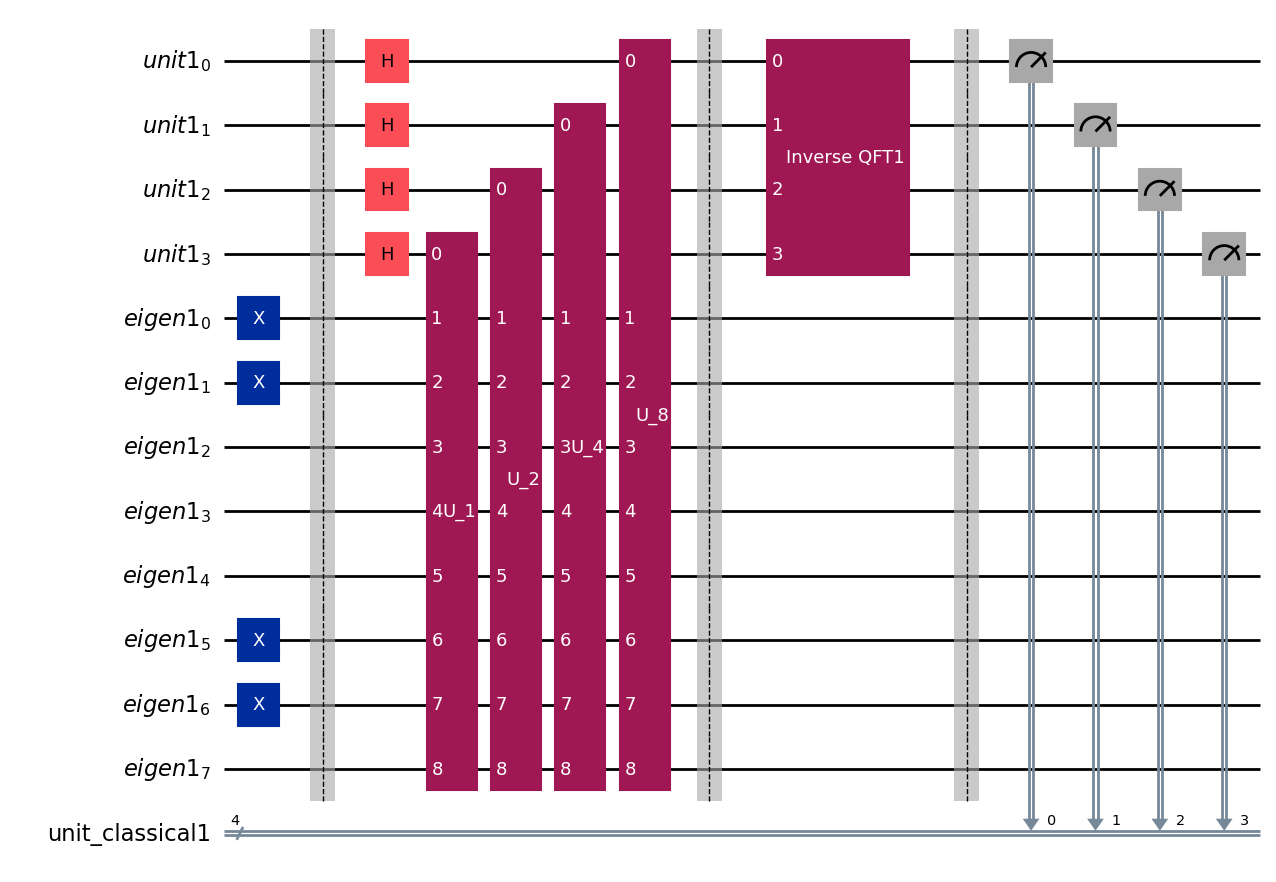

In [11]:
unit1 = QuantumRegister(4, 'unit1') 
eigen1 = QuantumRegister(8, 'eigen1')
unit_classical1 = ClassicalRegister(4, 'unit_classical1')
qc1 = QuantumCircuit(unit1, eigen1, unit_classical1)

eigenstates(qc1, eigen1, 0)  # 24

qc1.h(unit1[:])

phases1 = [
    .178 * pi, pi * .362, pi * .169, pi * .178,
    pi * .321, pi * .116, pi * .362, pi * .321,
    pi * .427, pi * .169, pi * .116, pi * .427
]  # a, b, c, d, e, f, g, h, i, j, k, l

for i in range(0, 4):
    qc1.append(final_U(i, eigen1, phases1), [unit1[3 - i]] + eigen1[:])

# Transformada cuántica de Fourier inversa
qc1.barrier()
qft1 = QFT(num_qubits=len(unit1), inverse=True, insert_barriers=True, do_swaps=False, name='Inverse QFT1')
qc1.append(qft1, qc1.qubits[:len(unit1)])
qc1.barrier()

# Medir
qc1.measure(unit1, unit_classical1)

# Dibujar el circuito
qc1.draw('mpl')

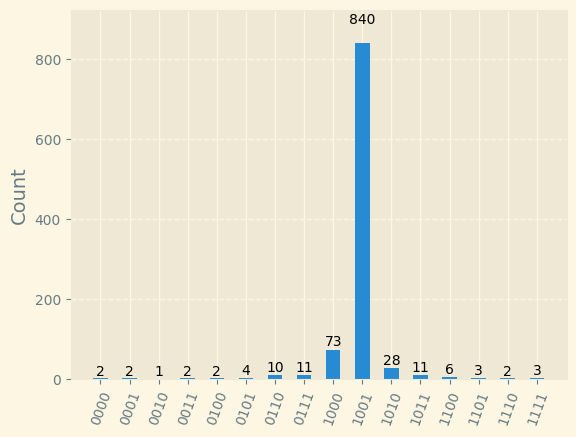

In [12]:
# Simulación
simulator1 = Aer.get_backend('aer_simulator')
qc1 = transpile(qc1, simulator1)
result1 = simulator1.run(qc1, shots=1000).result()
counts1 = result1.get_counts(qc1)

# Graficar el histograma
plot_histogram(counts1)
#101100
#101101

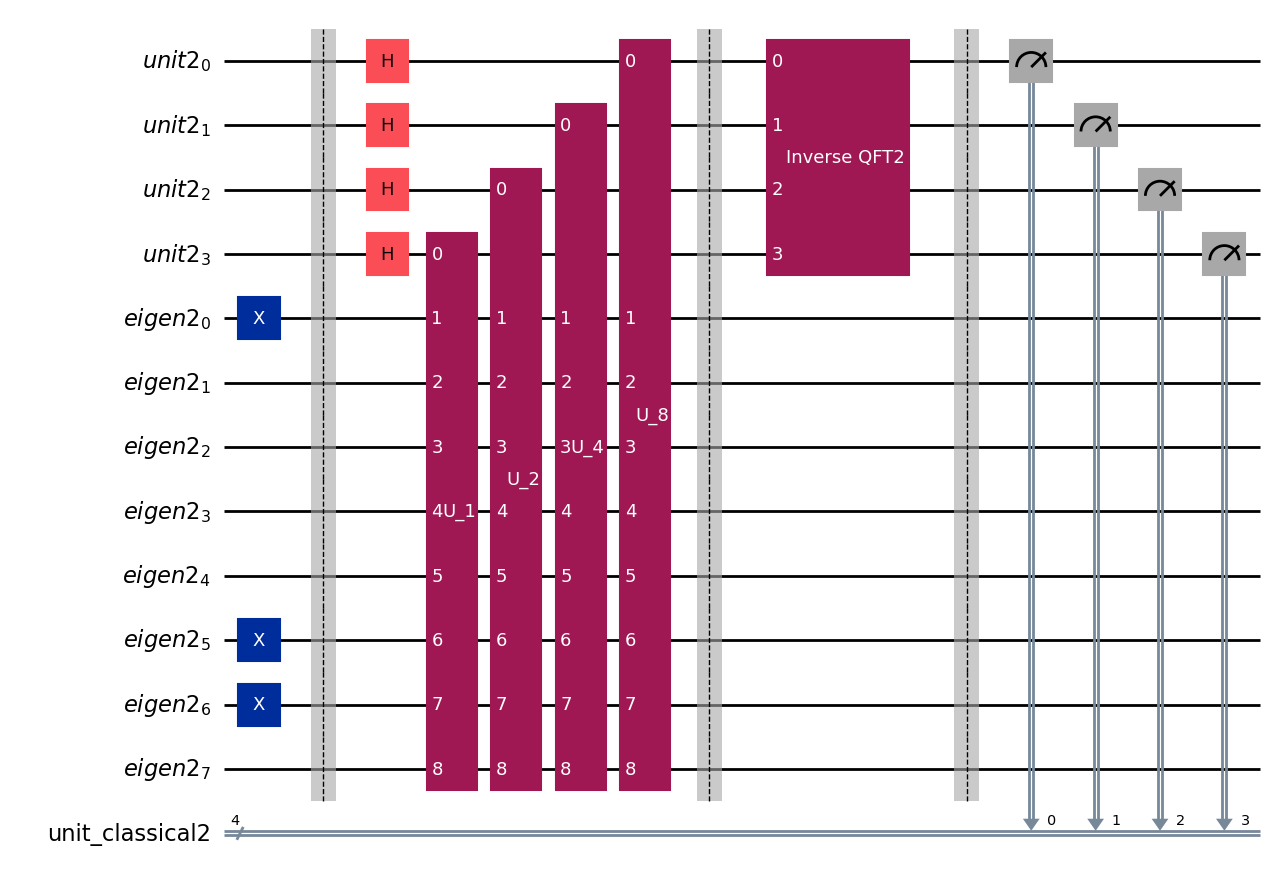

In [13]:

unit2 = QuantumRegister(4, 'unit2')  # cantidad de soluciones
eigen2 = QuantumRegister(8, 'eigen2')
unit_classical2 = ClassicalRegister(4, 'unit_classical2')
qc2 = QuantumCircuit(unit2, eigen2, unit_classical2)

eigenstates(qc2, eigen2, 1)  # 24

qc2.h(unit2[:])

phases2 = [
    .178 * pi, pi * .362, pi * .169, pi * .178,
    pi * .321, pi * .116, pi * .362, pi * .321,
    pi * .427, pi * .169, pi * .116, pi * .427
]  # a, b, c, d, e, f, g, h, i, j, k, l

for i in range(0, 4):
    qc2.append(final_U(i, eigen2, phases2), [unit2[3 - i]] + eigen2[:])

qc2.barrier()
qft2 = QFT(num_qubits=len(unit2), inverse=True, insert_barriers=True, do_swaps=False, name='Inverse QFT2')
qc2.append(qft2, qc2.qubits[:len(unit2)])
qc2.barrier()

# Medir
qc2.measure(unit2, unit_classical2)

# Dibujar el circuito
qc2.draw('mpl')

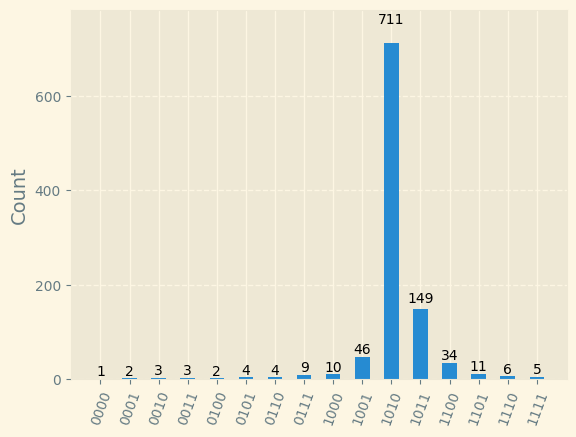

In [14]:
simulator2 = AerSimulator(method= 'automatic')
qc2 = transpile(qc2, simulator2)
result2 = simulator2.run(qc2, shots= 1000).result()
counts2 = result2.get_counts(qc2)
plot_histogram(counts2)
#100110

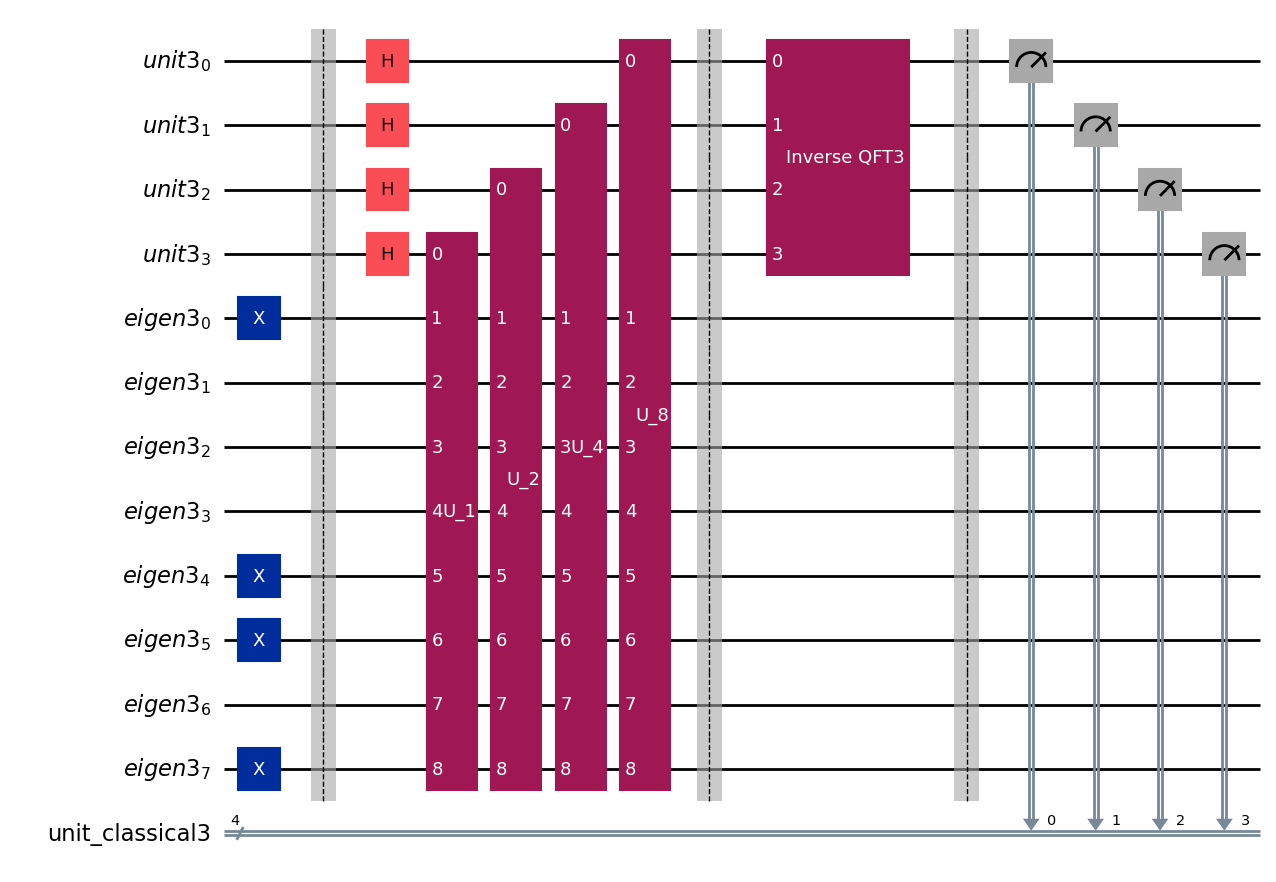

In [15]:

unit3 = QuantumRegister(4, 'unit3')  # cantidad de soluciones
eigen3 = QuantumRegister(8, 'eigen3')
unit_classical3 = ClassicalRegister(4, 'unit_classical3')
qc3 = QuantumCircuit(unit3, eigen3, unit_classical3)

eigenstates(qc3, eigen3, 2)  # 24

qc3.h(unit3[:])

phases3 = [
    .178 * pi, pi * .362, pi * .169, pi * .178,
    pi * .321, pi * .116, pi * .362, pi * .321,
    pi * .427, pi * .169, pi * .116, pi * .427
]  # a, b, c, d, e, f, g, h, i, j, k, l

for i in range(0, 4):
    qc3.append(final_U(i, eigen3, phases3), [unit3[3 - i]] + eigen3[:])

qc3.barrier()
qft3 = QFT(num_qubits=len(unit3), inverse=True, insert_barriers=True, do_swaps=False, name='Inverse QFT3')
qc3.append(qft3, qc3.qubits[:len(unit3)])
qc3.barrier()

# Medir
qc3.measure(unit3, unit_classical3)

# Dibujar el circuito
qc3.draw('mpl')


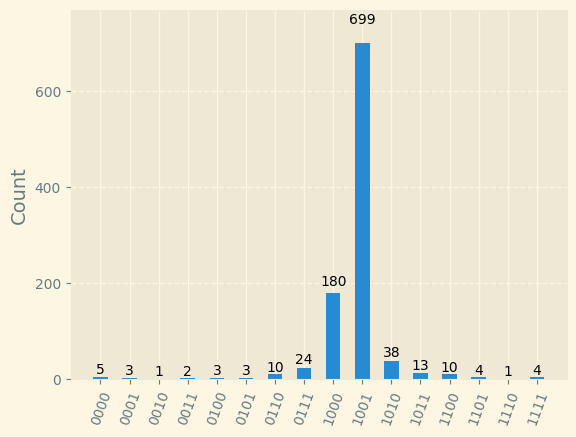

In [16]:
simulator3 = AerSimulator(method= 'automatic')
qc3 = transpile(qc3, simulator3)
result3 = simulator3.run(qc3, shots= 1000).result()
counts3 = result3.get_counts(qc3)
plot_histogram(counts3)

#010011

In [17]:
import pandas as pd
def calcular_ruta_adyacente(ciclo):
    nodos = ciclo.split("-")
    # Mover el último nodo al inicio
    ruta_adyacente = [nodos[-1]] + nodos[:-1]
    return "-".join(ruta_adyacente)

# Crear DataFrame inicial
df = pd.DataFrame({
    "Ciclos Hamiltonianos": ["0-1-2-3", "0-1-3-2", "0-3-1-2"]
})

#df["Ruta adyacente"] = ["3-0-1-2", "2-0-3-1","2-3-1-0"]
df["Ruta adyacente"] = ["3-0-1-2", "2-0-1-3","2-0-3-1"]

In [18]:
def obtener_maximo(diccionario):
    return max(diccionario, key=diccionario.get)
simulaciones = [counts1, counts2, counts3]
df["Simulación"] = [obtener_maximo(sim) for sim in simulaciones]
def calcular_fase(binario):
    valores_pi = [pi, pi / 2, pi / 4, pi / 8]
    fase = sum(int(bit) * valor for bit, valor in zip(binario, valores_pi))
    return fase
df["Fase Redondeada"] = df["Simulación"].apply(calcular_fase) / pi  # Divide por π
df["Fase Redondeada"] = df["Fase Redondeada"].apply(lambda x: f"{x:.3f}π")  # Formatea el resultado
df["Fase"] = df["Simulación"].apply(calcular_fase)
#df["Distancia"] =  df["Fase"]* ((sum(data["Distancia"])+max(data["Distancia"]))/2) / (2 * pi)
#3731 2905 2440

In [19]:
df

,Ciclos Hamiltonianos,Ruta adyacente,Simulación,Fase Redondeada,Fase
0,0-1-2-3,3-0-1-2,1001,1.125π,3.534292
1,0-1-3-2,2-0-1-3,1010,1.250π,3.926991
2,0-3-1-2,2-0-3-1,1001,1.125π,3.534292


In [20]:
from itertools import permutations

matriz = [
    [0, 718.58, 1457.88, 678.84],
    [718.58, 0, 1294.01, 467.76],
    [1457.88, 1294.01, 0, 1718.73],
    [678.84, 467.76, 1718.73, 0]
]

def ruta_mas_corta(matriz):
    n = len(matriz)  # Número de nodos
    nodos = list(range(n))  # Lista de nodos: [0, 1, 2, 3]
    rutas = permutations(nodos)  # Todas las permutaciones de nodos
    distancia_minima = float('inf')
    mejor_ruta = []

    for ruta in rutas:
        distancia = 0
        for i in range(n - 1):
            distancia += matriz[ruta[i]][ruta[i + 1]]
        
        if distancia < distancia_minima:
            distancia_minima = distancia
            mejor_ruta = ruta

    return mejor_ruta, distancia_minima

mejor_ruta, distancia_minima = ruta_mas_corta(matriz)
print("La ruta más corta es:", mejor_ruta)
print("La distancia mínima es:", distancia_minima)




La ruta más corta es: (0, 3, 1, 2)
La distancia mínima es: 2440.6099999999997


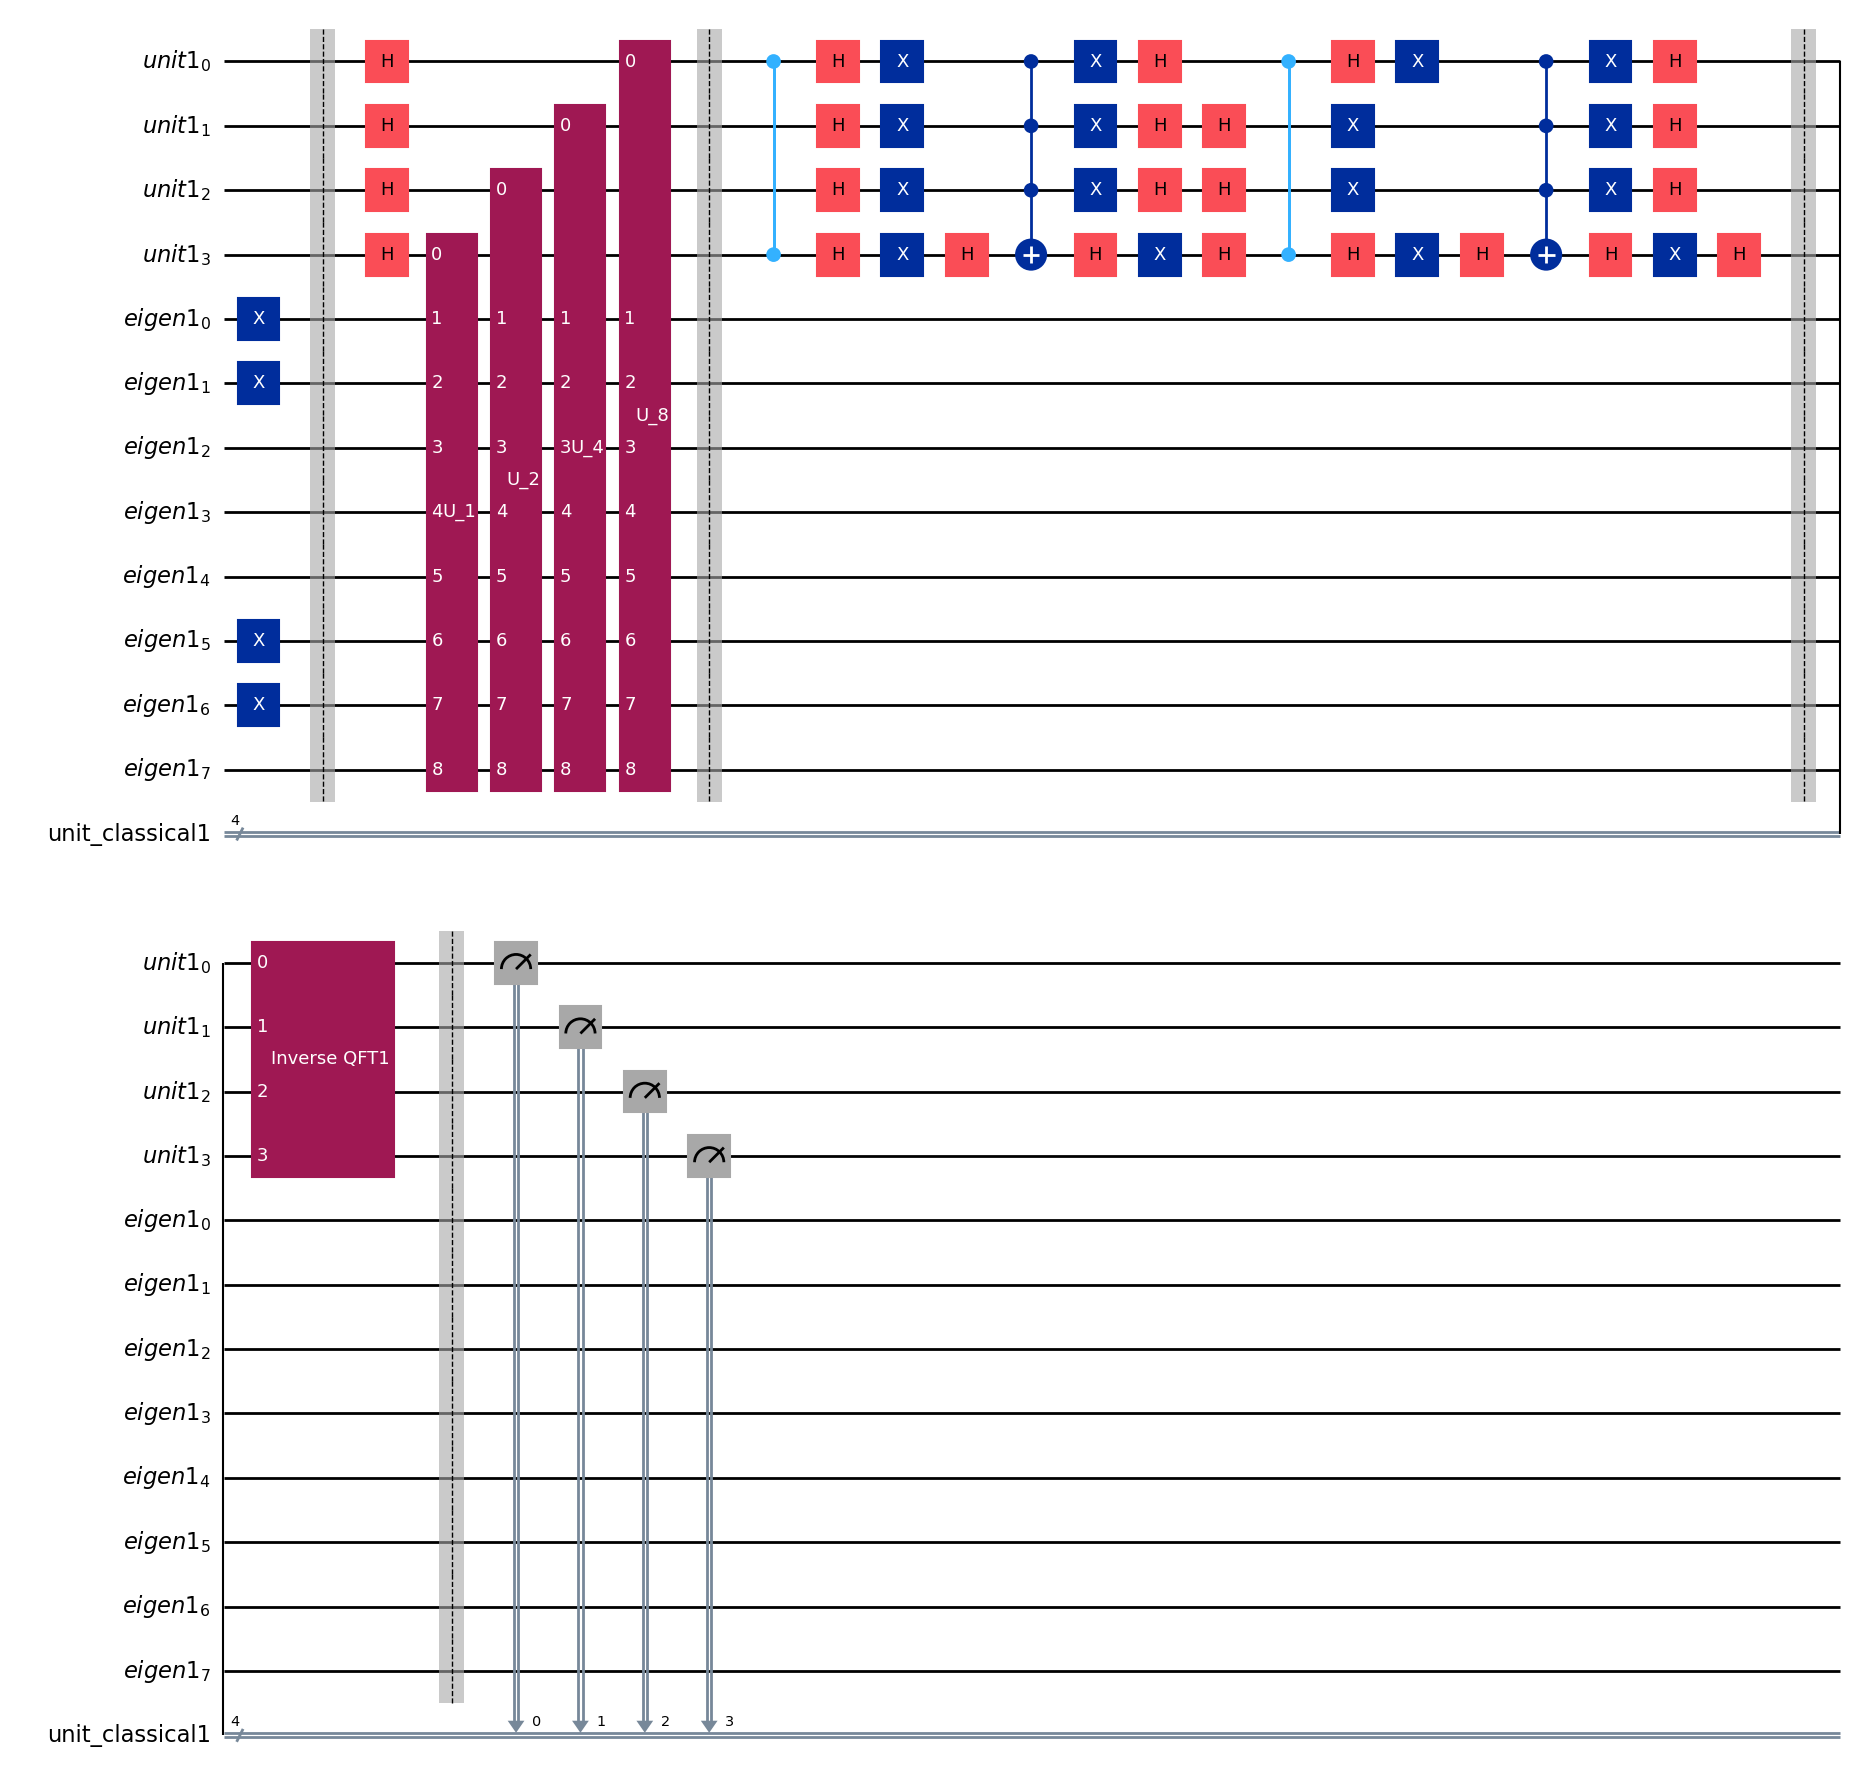

In [21]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit.circuit.library import QFT
from numpy import pi

unit1 = QuantumRegister(4, 'unit1')  
eigen1 = QuantumRegister(8, 'eigen1')
unit_classical1 = ClassicalRegister(4, 'unit_classical1')
qc1 = QuantumCircuit(unit1, eigen1, unit_classical1)

eigenstates(qc1, eigen1, 0)  # 24

qc1.h(unit1[:])

phases1 = [
    .23 * pi, pi * .26, pi * .21, pi * .23,
    pi * .41, pi * .15, pi * .46, pi * .41,
    pi * .54, pi * .21, pi * .15, pi * .54
]  # a, b, c, d, e, f, g, h, i, j, k, l

for i in range(0, 4):
    qc1.append(final_U(i, eigen1, phases1), [unit1[3 - i]] + eigen1[:])

def grover_oracle(qc, register, target_phase_index):
    """
    Marcador de solución: amplifica el índice de solución correcta
    en función de un índice `target_phase_index`.
    """
    qc.cz(register[target_phase_index], register[0]) 

def diffusion_operator(qc, register):
    """
    Difusión de Grover: inversión sobre la media.
    """
    qc.h(register)
    qc.x(register)
    qc.h(register[-1])
    qc.mcx(register[:-1], register[-1])  # Control múltiple
    qc.h(register[-1])
    qc.x(register)
    qc.h(register)

qc1.barrier()
iterations = 2 
target_index = 3 

for _ in range(iterations):
    grover_oracle(qc1, unit1, target_index)
    diffusion_operator(qc1, unit1)

# Transformada cuántica de Fourier inversa
qc1.barrier()
qft1 = QFT(num_qubits=len(unit1), inverse=True, insert_barriers=True, do_swaps=False, name='Inverse QFT1')
qc1.append(qft1, qc1.qubits[:len(unit1)])
qc1.barrier()

qc1.measure(unit1, unit_classical1)

qc1.draw('mpl')


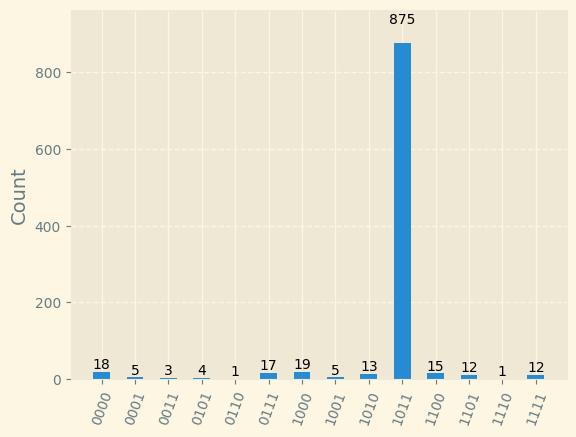

In [22]:
simulator1 = Aer.get_backend('aer_simulator')
qc1 = transpile(qc1, simulator1)
result1 = simulator1.run(qc1, shots=1000).result()
counts1 = result1.get_counts(qc1)

plot_histogram(counts1)
#2-3

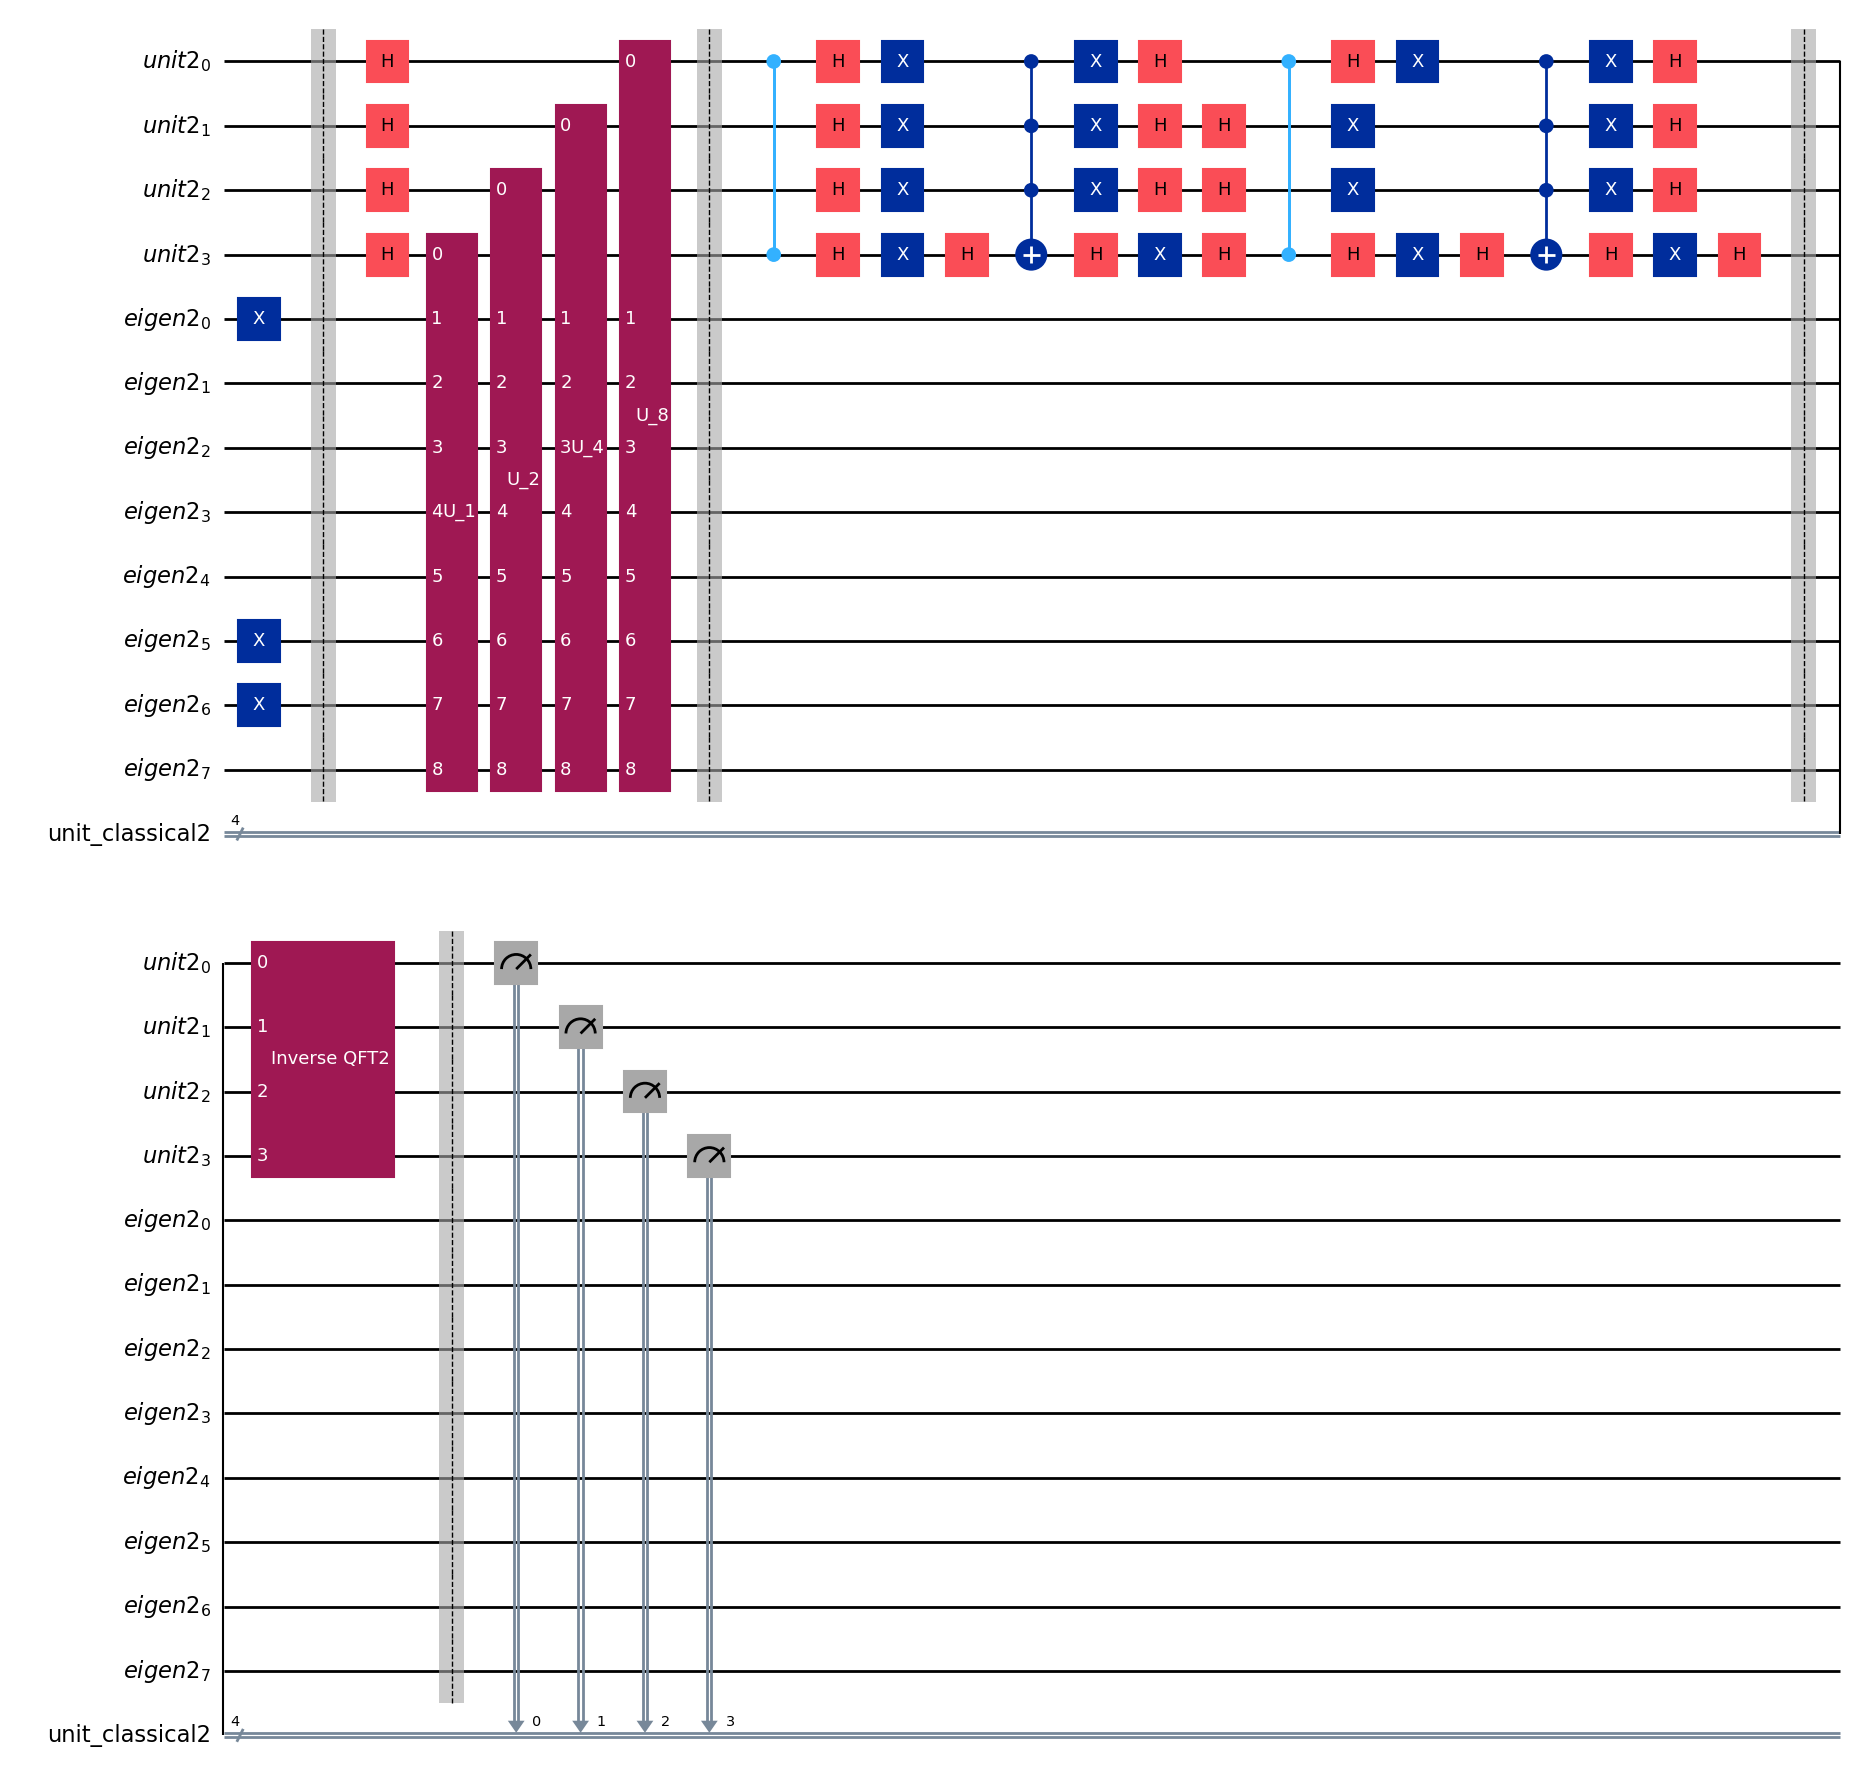

In [23]:


# Registro cuántico y clásico
unit2 = QuantumRegister(4, 'unit2')  # cantidad de soluciones
eigen2 = QuantumRegister(8, 'eigen2')
unit_classical2 = ClassicalRegister(4, 'unit_classical2')
qc2 = QuantumCircuit(unit2, eigen2, unit_classical2)

# Función ficticia `eigenstates` (debes definirla previamente)
eigenstates(qc2, eigen2, 1)  # 24

# Aplicar Hadamard
qc2.h(unit2[:])

# Definición de fases
phases2 = [
    .23 * pi, pi * .26, pi * .21, pi * .23,
    pi * .41, pi * .15, pi * .46, pi * .41,
    pi * .54, pi * .21, pi * .15, pi * .54
]  # a, b, c, d, e, f, g, h, i, j, k, l

# Aplicar `final_U`
for i in range(0, 4):
    qc2.append(final_U(i, eigen2, phases2), [unit2[3 - i]] + eigen2[:])

# Grover Adaptive Search
def grover_oracle(qc, register, target_phase_index):
    """
    Marcador de solución: amplifica el índice de solución correcta
    en función de un índice `target_phase_index`.
    """
    qc.cz(register[target_phase_index], register[0])  # Ejemplo: aplicar CZ al índice correcto

def diffusion_operator(qc, register):
    """
    Difusión de Grover: inversión sobre la media.
    """
    qc.h(register)
    qc.x(register)
    qc.h(register[-1])
    qc.mcx(register[:-1], register[-1])  # Control múltiple
    qc.h(register[-1])
    qc.x(register)
    qc.h(register)

qc2.barrier()
iterations = 2 
target_index = 3

for _ in range(iterations):
    grover_oracle(qc2, unit2, target_index)
    diffusion_operator(qc2, unit2)

qc2.barrier()
qft2 = QFT(num_qubits=len(unit2), inverse=True, insert_barriers=True, do_swaps=False, name='Inverse QFT2')
qc2.append(qft2, qc2.qubits[:len(unit2)])
qc2.barrier()

qc2.measure(unit2, unit_classical2)

# Dibujar el circuito
qc2.draw('mpl')



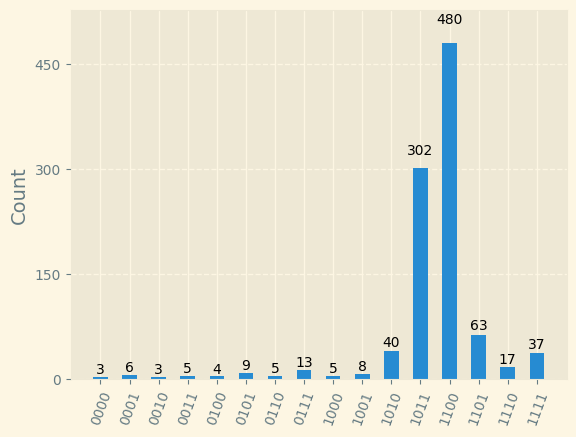

In [24]:
simulator2 = Aer.get_backend('aer_simulator')
qc2 = transpile(qc2, simulator2)
result2 = simulator2.run(qc2, shots=1000).result()
counts2 = result2.get_counts(qc2)

# Graficar el histograma
plot_histogram(counts2) 
#2-0

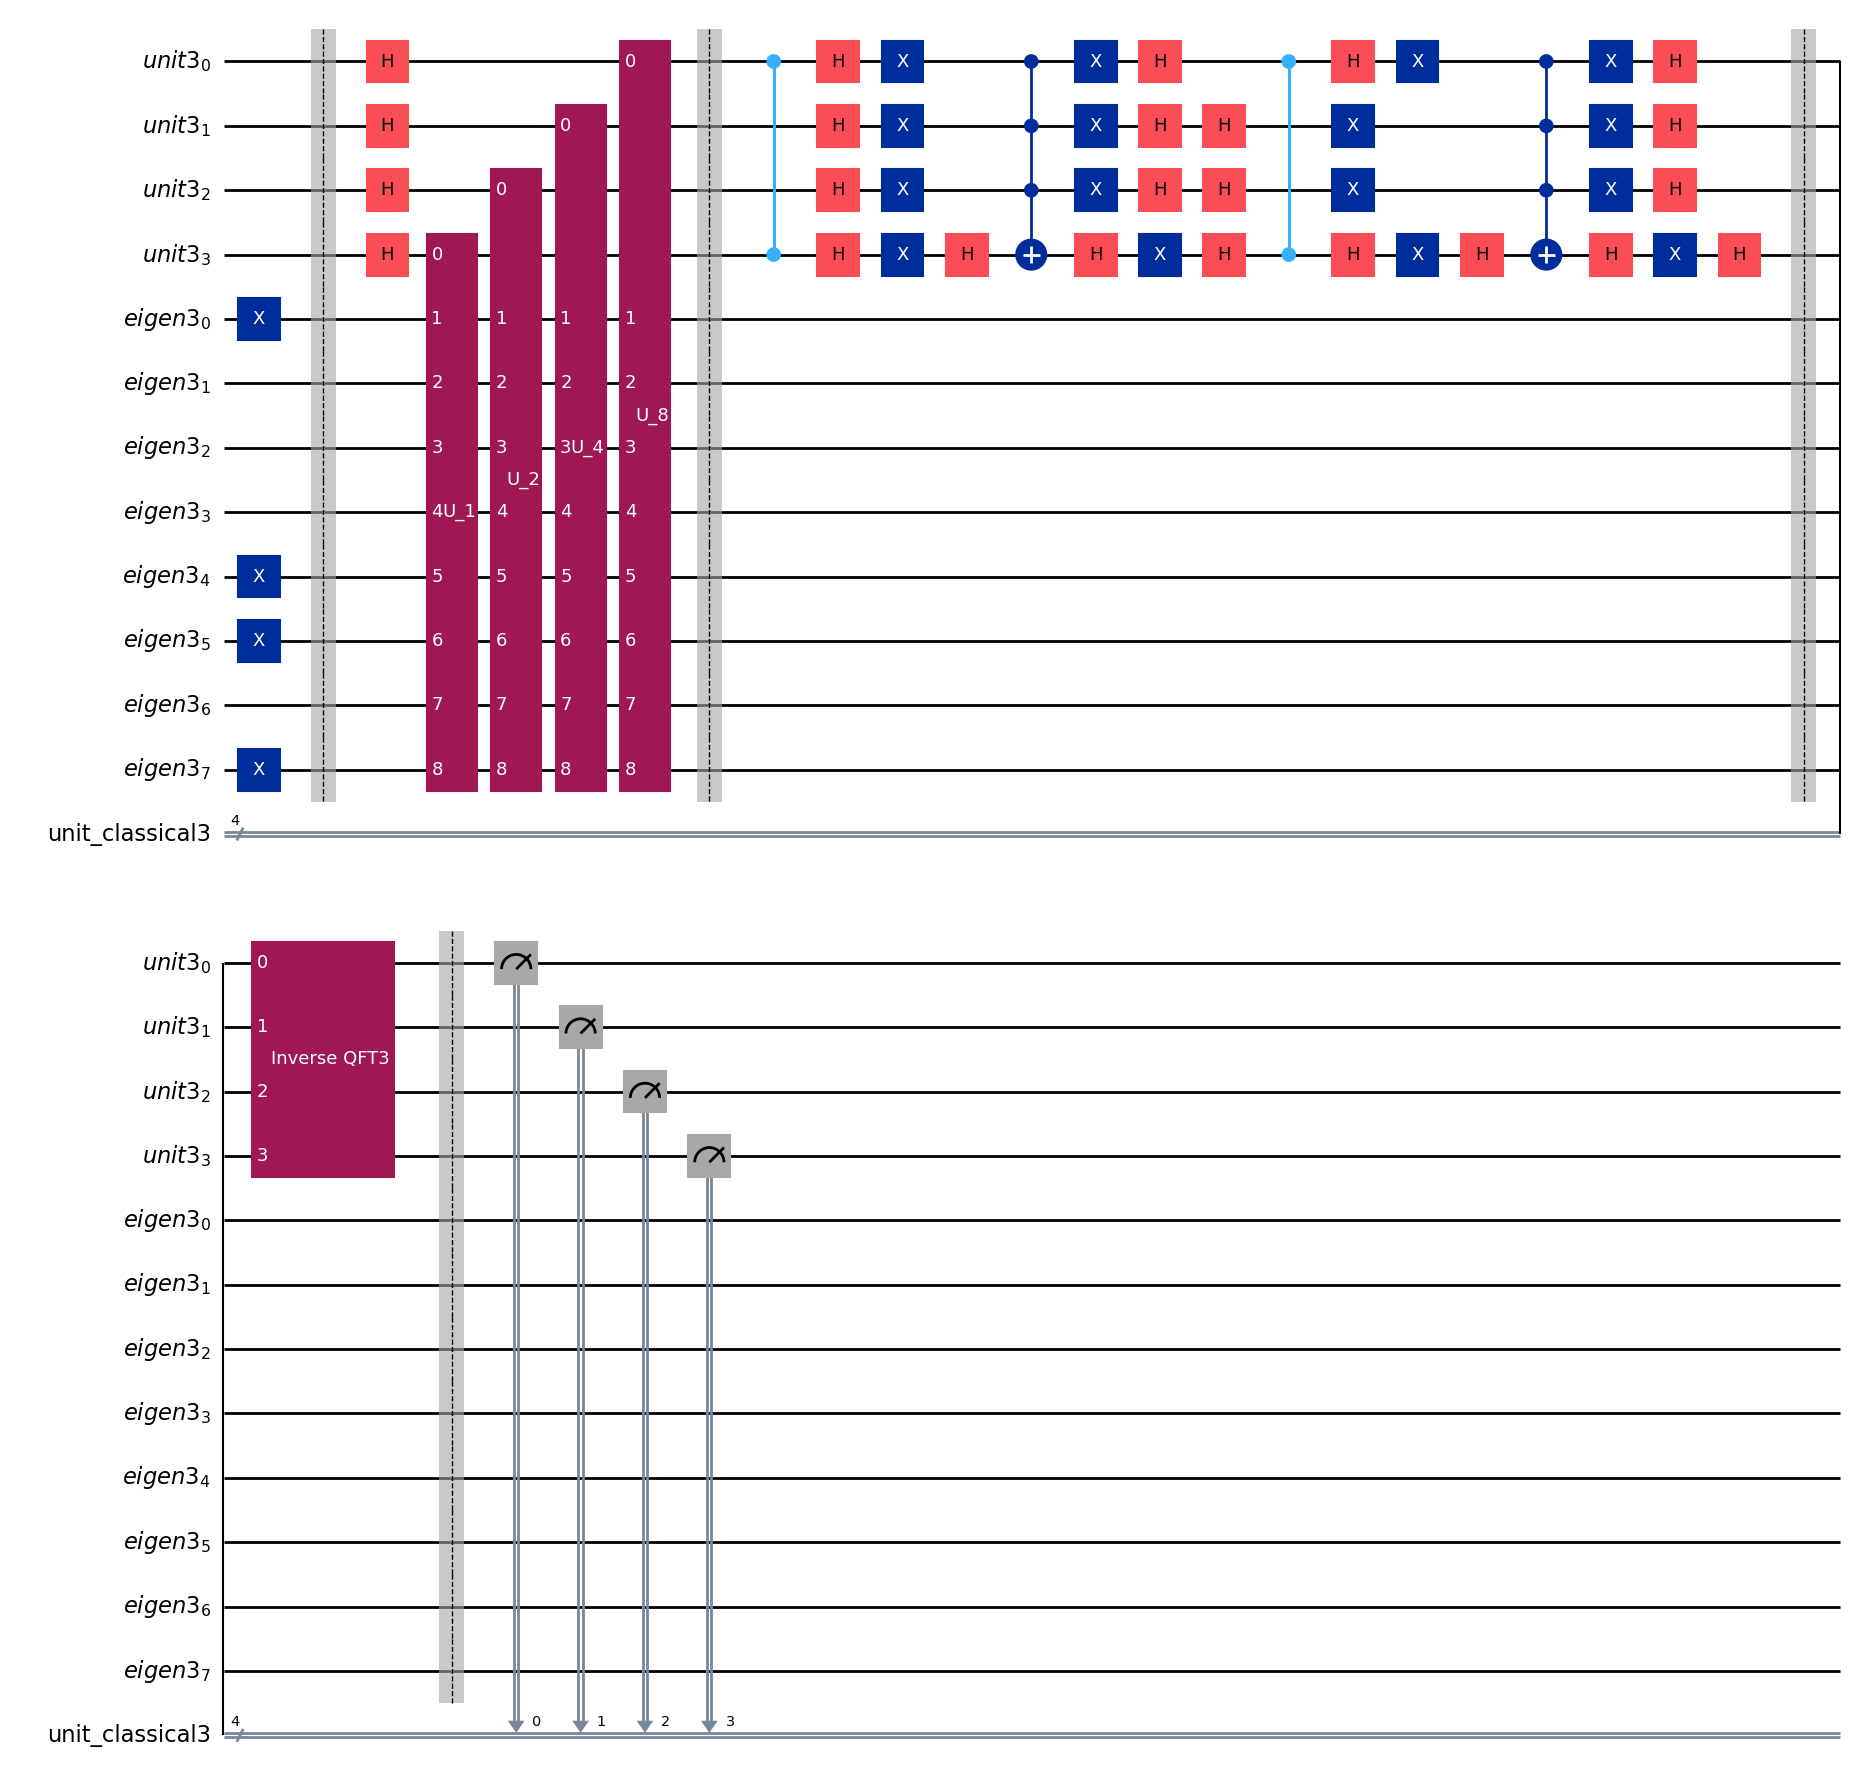

In [25]:

unit3 = QuantumRegister(4, 'unit3')  # cantidad de soluciones
eigen3 = QuantumRegister(8, 'eigen3')
unit_classical3 = ClassicalRegister(4, 'unit_classical3')
qc3 = QuantumCircuit(unit3, eigen3, unit_classical3)

eigenstates(qc3, eigen3, 2)  # 24

qc3.h(unit3[:])

phases3 = [
    .23 * pi, pi * .26, pi * .21, pi * .23,
    pi * .41, pi * .15, pi * .46, pi * .41,
    pi * .54, pi * .21, pi * .15, pi * .54
]  # a, b, c, d, e, f, g, h, i, j, k, l

# Aplicar `final_U`
for i in range(0, 4):
    qc3.append(final_U(i, eigen3, phases3), [unit3[3 - i]] + eigen3[:])

def grover_oracle(qc, register, target_phase_index):
    """
    Marcador de solución: amplifica el índice de solución correcta
    en función de un índice `target_phase_index`.
    """
    qc.cz(register[target_phase_index], register[0])  # Ejemplo: aplicar CZ al índice correcto

def diffusion_operator(qc, register):
    """
    Difusión de Grover: inversión sobre la media.
    """
    qc.h(register)
    qc.x(register)
    qc.h(register[-1])
    qc.mcx(register[:-1], register[-1])  # Control múltiple
    qc.h(register[-1])
    qc.x(register)
    qc.h(register)

qc3.barrier()
iterations = 2  
target_index = 3 

for _ in range(iterations):
    grover_oracle(qc3, unit3, target_index)
    diffusion_operator(qc3, unit3)


qc3.barrier()
qft3 = QFT(num_qubits=len(unit3), inverse=True, insert_barriers=True, do_swaps=False, name='Inverse QFT3')
qc3.append(qft3, qc3.qubits[:len(unit3)])
qc3.barrier()

# Medir
qc3.measure(unit3, unit_classical3)

# Dibujar el circuito
qc3.draw('mpl')


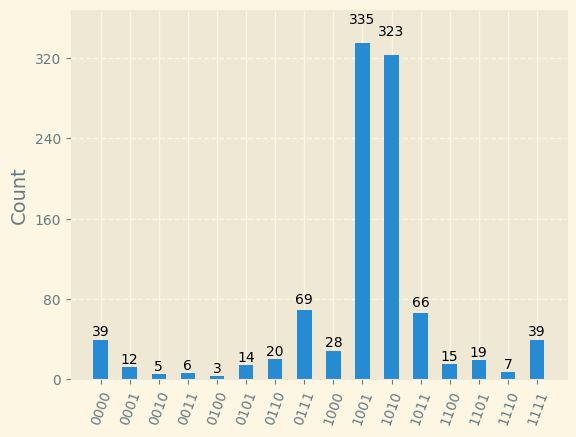

In [26]:
simulator3 = Aer.get_backend('aer_simulator')
qc3 = transpile(qc3, simulator3)
result3 = simulator3.run(qc3, shots=1000).result()
counts3 = result3.get_counts(qc3)

# Graficar el histograma
plot_histogram(counts3) 
#2-0
#2-1

In [27]:
def obtener_maximo(diccionario):
    return max(diccionario, key=diccionario.get)
simulaciones = [counts1, counts2, counts3]
df["Simulación"] = [obtener_maximo(sim) for sim in simulaciones]
def calcular_fase(binario):
    valores_pi = [pi, pi / 2, pi / 4, pi / 8]
    fase = sum(int(bit) * valor for bit, valor in zip(binario, valores_pi))
    return fase
df["Fase Redondeada"] = df["Simulación"].apply(calcular_fase) / pi  # Divide por π
df["Fase Redondeada"] = df["Fase Redondeada"].apply(lambda x: f"{x:.3f}π")  # Formatea el resultado
df["Fase"] = df["Simulación"].apply(calcular_fase)
#df["Distancia"] =  df["Fase"]* ((sum(data["Distancia"])+max(data["Distancia"]))/2) / (2 * pi)
#3731 2905 2440

In [28]:
df

,Ciclos Hamiltonianos,Ruta adyacente,Simulación,Fase Redondeada,Fase
0,0-1-2-3,3-0-1-2,1011,1.375π,4.319690
1,0-1-3-2,2-0-1-3,1100,1.500π,4.712389
2,0-3-1-2,2-0-3-1,1001,1.125π,3.534292


In [29]:
counts1

{'1011': 875,
 '1111': 12,
 '1001': 5,
 '1010': 13,
 '1100': 15,
 '0000': 18,
 '0111': 17,
 '1101': 12,
 '0001': 5,
 '1000': 19,
 '1110': 1,
 '0101': 4,
 '0011': 3,
 '0110': 1}

In [30]:
counts2

{'1100': 480,
 '1011': 302,
 '1101': 63,
 '1010': 40,
 '1001': 8,
 '1110': 17,
 '0101': 9,
 '1000': 5,
 '1111': 37,
 '0001': 6,
 '0000': 3,
 '0111': 13,
 '0011': 5,
 '0110': 5,
 '0010': 3,
 '0100': 4}

In [31]:
counts3

{'0110': 20,
 '1001': 335,
 '1010': 323,
 '1101': 19,
 '0000': 39,
 '0111': 69,
 '0010': 5,
 '1100': 15,
 '0100': 3,
 '1111': 39,
 '1011': 66,
 '0101': 14,
 '1000': 28,
 '0001': 12,
 '1110': 7,
 '0011': 6}